In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sys.path.append('../../')
import Constants as c
import Utilities as utils

In [2]:
file_line = "./05_16_2020/performance_measures_Line.csv"
file_Module = "./05_16_2020/performance_measures_Module.csv"

df_Line = pd.read_csv(file_line)
df_Module = pd.read_csv(file_Module)

df_Line.drop(df_Line.columns[0], axis=1)
df_Line.dropna(subset=[c.PRED_25], inplace=True)
df_Line.dropna(subset=[c.PRED_50], inplace=True)
# df_Line = df_Line.sample(n=500)

df_Module.drop(df_Module.columns[0], axis=1)
df_Module.dropna(subset=[c.PRED_25], inplace=True)
df_Module.dropna(subset=[c.PRED_50], inplace=True)
# df_Module = df_Module.sample(n=500)

df = pd.concat([df_Line, df_Module])

In [3]:
# df.head()

In [4]:
def hypothesisTest_Effort(model_records, model, task, pred, mean):
    print("Hypothesis test for {0} and task = '{1}'".format(model, task))

    # print (df.head())
    if task != "ALL":
        filter = model_records[c.TASK] == task
        model_records = model_records[filter]
        print("TASK - number records: {0}".format(len(model_records)))
    
    if model == c.LINE:
        filter1 = (model_records[c.MODEL] == c.LINE_CC)
        filter2 = (model_records[c.MODEL] == c.LINE_EC)
        model_records = model_records[filter1 | filter2]
        print("LINE - number records: {0}".format(len(model_records)))
    elif model == c.MODULE:
        filter1 = (model_records[c.MODEL] == c.MODULE_CC)
        filter2 = (model_records[c.MODEL] == c.MODULE_EC)
        model_records = model_records[filter1 | filter2]
        print("MODULE - number records: {0}".format(len(model_records)))

    # print(model_records.head())
    num_records = len(model_records)
    model_records_mean = round(model_records[pred].mean(),2)

    print("Number of records: {0}".format(num_records))
    print("Sample mean: ", model_records_mean)
    
    alpha = 0.05
    is_gaussian = utils.gaussian_test(model_records[pred], alpha)

    if is_gaussian:
        if num_records <= 60:
            utils.one_sample_t_test(model_records[pred], mean, alpha)
        else:
            utils.one_sample_z_test(model_records[pred], mean, alpha)
    else:
        utils.one_sample_sign_test(model_records[pred], mean, alpha)

    plt.figure(figsize=(8,3))
    plt.tight_layout()
    sb.distplot(model_records[pred], kde=False)


In [5]:
task = "BUG"

Hypothesis test for Module and task = 'BUG'
TASK - number records: 244
MODULE - number records: 123
Number of records: 123
Sample mean:  0.35
Shapiro p-value:  0.0037
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  2.912355660156403e-10
One Sample Sign Test: 0.35 sample median is not likely to be greater than 0.53 (reject H0)


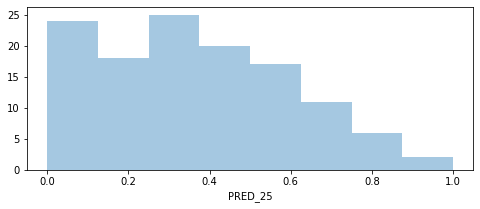

In [6]:
hypothesisTest_Effort(df.copy(), c.MODULE, task, c.PRED_25, 0.53)

Hypothesis test for Module and task = 'BUG'
TASK - number records: 244
MODULE - number records: 123
Number of records: 123
Sample mean:  0.51
Shapiro p-value:  0.0054
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  4.9768497298434395e-24
One Sample Sign Test: 0.51 sample median is not likely to be greater than 0.87 (reject H0)


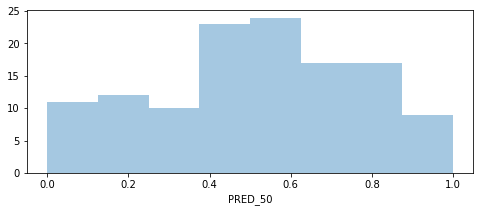

In [7]:
hypothesisTest_Effort(df.copy(), c.MODULE, task, c.PRED_50, 0.87)

Hypothesis test for Line and task = 'BUG'
TASK - number records: 244
LINE - number records: 121
Number of records: 121
Sample mean:  0.21
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  3.1396433276298443e-10
One Sample Sign Test: 0.21 sample median is not likely to be greater than 0.33 (reject H0)


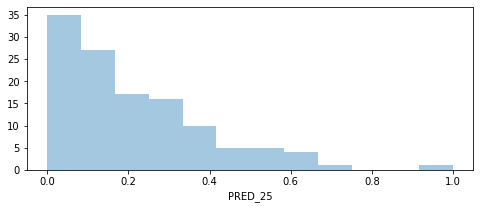

In [8]:
hypothesisTest_Effort(df.copy(), c.LINE, task, c.PRED_25, 0.33)

Hypothesis test for Line and task = 'BUG'
TASK - number records: 244
LINE - number records: 121
Number of records: 121
Sample mean:  0.34
Shapiro p-value:  0.0093
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  4.764406071312227e-19
One Sample Sign Test: 0.34 sample median is not likely to be greater than 0.6 (reject H0)


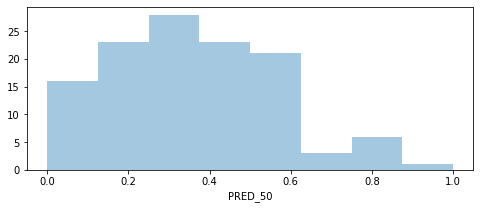

In [9]:
hypothesisTest_Effort(df.copy(), c.LINE, task, c.PRED_50, 0.60)